Goal: 
- Create an analyse that will compute for each brain voxels the spinal level gave the maximal corr value (from C1 to C7)
- Each voxel will have the value of the segment: 1,2,3,4,5,6 or 7

## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [2]:
import sys,json
import warnings

sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/2024_brsc_fc_project/code/")

from winner_take_all import WinnerAll

%matplotlib inline
%load_ext autoreload
%autoreload 2

## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [3]:
# Load config file ------------------------------------------------------------
with open('../config/05_brsc_seed2voxels.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified



### <font color=#4424D6> II. Compute individual WTA maps </font>


In [4]:
WTA_f=[]
for threshold in [0]:
    for cluster in [100]:
        GradMaps=WinnerAll(config,indiv=True,verbose=False) # initialize the function
        output_tag="WTA_zcorr"
        WTA_f.append(GradMaps.compute_GradMaps(output_tag=output_tag,fwhm=[0,0,0],cluster_threshold=cluster,apply_threshold=threshold,redo=True,verbose=True))
    
   

---------- Initialization info: 
icap_C1_gm will have a value of: 1
icap_C2_gm will have a value of: 2
icap_C3_gm will have a value of: 3
icap_C4_gm will have a value of: 4
icap_C5_gm will have a value of: 5
icap_C6_gm will have a value of: 6
icap_C7_gm will have a value of: 7


### <font color=#4424D6> III. Plot reproducibility of the winner-take-all maps across individuals </font>

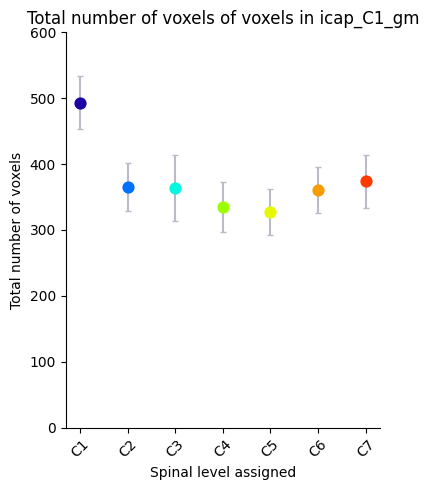

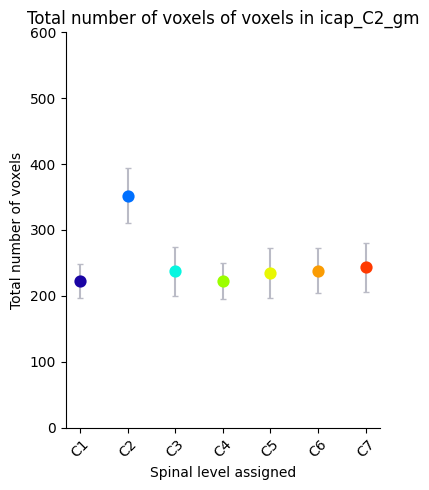

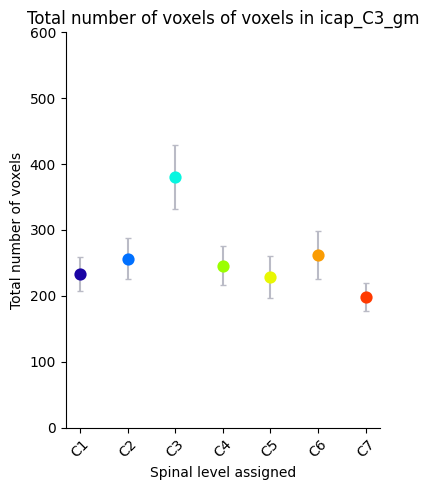

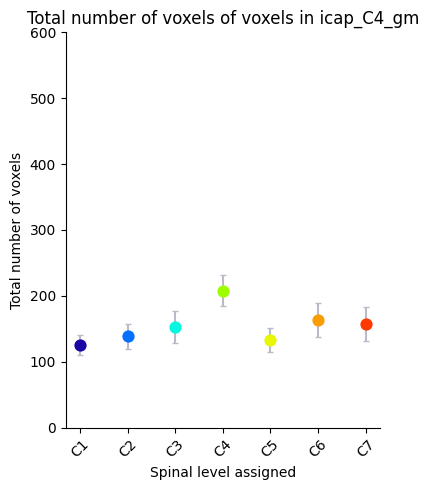

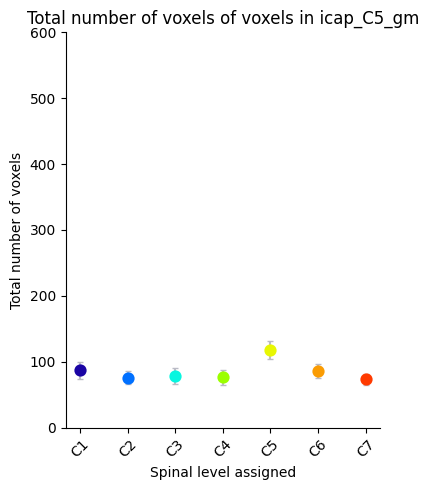

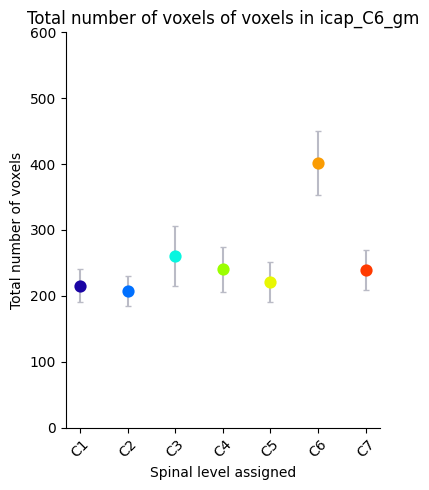

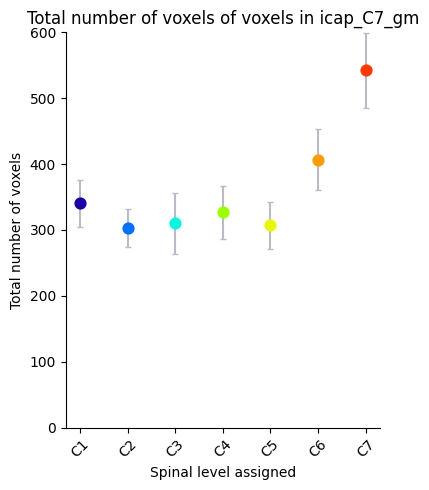

In [5]:
df=GradMaps.voxel_distr_GradMaps(input_file=WTA_f[0],save_plot=True,redo=True)

### <font color=#4424D6> IV. Run statistics </font>

In [49]:
warnings.filterwarnings('ignore')
assigned_levels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
mask_list=config["seeds"]["seed_names"]
GradMaps.voxel_distr_stats(df=df,assigned_levels=assigned_levels,mask_list=mask_list)

Statistical results for mask: icap_C1_gm
               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Total_vox 
No. Observations:     217         Method:                 REML      
No. Groups:           31          Scale:                  48244.6061
Min. group size:      7           Log-Likelihood:         -1442.3202
Max. group size:      7           Converged:              Yes       
Mean group size:      7.0                                           
--------------------------------------------------------------------
                      Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------------------------------------------
Intercept             493.387   39.450 12.507 0.000  416.067 570.707
level_assigned[T.C2] -128.387   55.790 -2.301 0.021 -237.734 -19.040
level_assigned[T.C3] -129.452   55.790 -2.320 0.020 -238.799 -20.105
level_assigned[T.C4] -158.000   55.790 -2.832 0.005 -267.347 -48.653
level_ass

## 